In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


sns.set_style('darkgrid')
sns.set_context('notebook')

In [2]:
class IzhikevichNeuron:
    def __init__(self, label, a, b, c, d, v0, u0=None):
        self.label = label

        self.a = a
        self.b = b
        self.c = c
        self.d = d

        self.v0 = v0
        self.u0 = u0
        if self.u0 is None:
            self.u0 = b*v0

        self.v = self.v0
        self.u = self.u0        
    
    def reset(self):
        self.v = self.v0
        self.u = self.u0

    
class Simulator:
    def __init__(self, n, stim_fn, T, dt=0.25, x=5, y=140, du=None):
        self.neuron = n
        self.time = np.arange(0, T+dt, dt)
        self.dt = dt
        self.x = x
        self.y = y
        self.du = du
        if self.du is None:
            self.du = lambda n: n.a*(n.b*n.v - n.u)
        stim_fn = np.vectorize(stim_fn, otypes=[np.float])
        self.stim = stim_fn(self.time)
    
    def run(self):
        n = self.neuron

        trace = np.zeros((2, len(self.stim)))
        for i, s in enumerate(self.stim):
            n.v += (0.04*n.v**2 + self.x*n.v + self.y - n.u + s) * self.dt
            n.u += self.dt * self.du(n)
          
            if n.v > 30:
                trace[0,i] = 30
                n.v = n.c
                n.u += n.d
            else:
                trace[0,i] = n.v
                trace[1,i] = n.u
        return trace

In [3]:
sims = []

# (A) tonic spiking
n = IzhikevichNeuron("(A) tonic spiking", a=0.02, b=0.2, c=-65, d=6, v0=-70)
s = Simulator(n, stim_fn=lambda t: 14 if t > 10 else 0, T=100)
sims.append(s)

# (B) phasic spiking
n = IzhikevichNeuron("(B) phasic spiking", a=0.02, b=0.25, c=-65, d=6, v0=-64)
s = Simulator(n, stim_fn=lambda t: 0.5 if t > 20 else 0, T=200)
sims.append(s)

# (C) tonic bursting
n = IzhikevichNeuron("(C) tonic bursting", a=0.02, b=0.25, c=-50, d=2, v0=-70)
s = Simulator(n, stim_fn=lambda t: 15 if t > 22 else 0, T=220)
sims.append(s)

# (D) phasic bursting
n = IzhikevichNeuron("(D) phasic bursting", a=0.02, b=0.25, c=-55, d=0.05, v0=-70)
s = Simulator(n, stim_fn=lambda t: 0.6 if t > 20 else 0, T=200)
sims.append(s)

# (E) mixed mode
n = IzhikevichNeuron("(E) mixed mode", a=0.02, b=0.2, c=-55, d=4, v0=-70)
s = Simulator(n, stim_fn=lambda t: 10 if t > 16 else 0, T=160)
sims.append(s)

# (F) spike freq. adapt
n = IzhikevichNeuron("(F) spike freq. adapt", a=0.01, b=0.2, c=-65, d=8, v0=-70)
s = Simulator(n, stim_fn=lambda t: 30 if t > 8.5 else 0, T=85)
sims.append(s)

# (G) Class 1 exc.
n = IzhikevichNeuron("(G) Class 1 exc.", a=0.02, b=-0.1, c=-55, d=6, v0=-60)
s = Simulator(n, stim_fn=lambda t: 0.075*(t-30) if t > 30 else 0, T=300, x=4.1, y=108)
sims.append(s)

# (H) Class 2 exc.
n = IzhikevichNeuron("(H) Class 2 exc.", a=0.2, b=0.26, c=-65, d=0, v0=-64)
s = Simulator(n, stim_fn=lambda t: -0.5+(0.015*(t-30)) if t > 30 else -0.5, T=300)
sims.append(s)

# (I) spike latency
n = IzhikevichNeuron("(I) spike latency", a=0.02, b=0.2, c=-65, d=6, v0=-70)
s = Simulator(n, stim_fn=lambda t: 7.04 if 10 < t < 13 else 0, T=100, dt=0.2)
sims.append(s)

# (J) subthresh. osc.
n = IzhikevichNeuron("(J) subthresh. osc.", a=0.05, b=0.26, c=-60, d=0, v0=-62)
s = Simulator(n, stim_fn=lambda t: 2 if 20 < t < 25 else 0, T=200)
sims.append(s)

# (K) resonator
n = IzhikevichNeuron("(K) resonator", a=0.1, b=0.26, c=-60, d=-1, v0=-62)
def stim_fn(t):
    times = np.array([40,60,280,320])
    if ((times < t) & (t < times+4)).any():
        return 0.65
    return 0
s = Simulator(n, stim_fn=stim_fn, T=400)
sims.append(s)

# (L) integrator
n = IzhikevichNeuron("(L) integrator", a=0.02, b=-0.1, c=-55, d=6, v0=-60)
def stim_fn(t):
    times = np.array([9.09,14.09,70,80])
    if ((times < t) & (t < times+2)).any():
        return 9
    return 0
s = Simulator(n, stim_fn=stim_fn, T=100, x=4.1, y=108)
sims.append(s)

# (M) rebound spike
n = IzhikevichNeuron("(M) rebound spike", a=0.03, b=0.25, c=-60, d=4, v0=-64)
s = Simulator(n, stim_fn=lambda t: -15 if 20 < t < 25 else 0, T=200, dt=0.2)
sims.append(s)

# (N) rebound burst
n = IzhikevichNeuron("(N) rebound burst", a=0.03, b=0.25, c=-52, d=0, v0=-64)
s = Simulator(n, stim_fn=lambda t: -15 if 20 < t < 25 else 0, T=200, dt=0.2)
sims.append(s)

# (O) thresh. variability
n = IzhikevichNeuron("(O) thresh. variability", a=0.03, b=0.25, c=-60, d=4, v0=-64)
def stim_fn(t):
    if (10 < t < 15) or (80 < t < 85): 
        return 1
    elif 70 < t < 75:
        return -6
    return 0
s = Simulator(n, stim_fn=stim_fn, T=100)
sims.append(s)

# (P) bistability
n = IzhikevichNeuron("(P) bistability", a=0.1, b=0.26, c=-60, d=0, v0=-61)
s = Simulator(n, stim_fn=lambda t: 1.24 if (37.5 < t < 42.5) or (216 < t < 221) else 0.24, T=300)
sims.append(s)

# (Q) DAP
n = IzhikevichNeuron("(Q) DAP", a=1, b=0.2, c=-60, d=-21, v0=-70)
s = Simulator(n, stim_fn=lambda t: 20 if -1 < (t - 10) < 1 else 0, T=50, dt=0.1)
sims.append(s)

# (R) accomodation
n = IzhikevichNeuron("(R) accomodation", a=0.02, b=1, c=-55, d=4, v0=-65, u0=-16)
def stim_fn(t):
    if t < 200:
        return t/25
    elif t < 300:
        return 0
    elif t < 312.5:
        return (t - 300) / 12.5 * 4
    return 0
s = Simulator(n, stim_fn=stim_fn, T=400, dt=0.5, du=lambda n: n.a*(n.b*(n.v + 65)))
sims.append(s)

# (S) inhibition induced spiking
n = IzhikevichNeuron("(S) inhibition induced spiking", a=-0.02, b=-1, c=-60, d=8, v0=-63.8)
s = Simulator(n, stim_fn=lambda t: 80 if t < 50 or t > 250 else 75, T=350, dt=0.5)
sims.append(s)

# (T) inhibition induced bursting
n = IzhikevichNeuron("(T) inhibition induced bursting", a=-0.026, b=-1, c=-45, d=-2, v0=-63.8)
s = Simulator(n, stim_fn=lambda t: 80 if t < 50 or t > 250 else 75, T=350, dt=0.5)
sims.append(s)

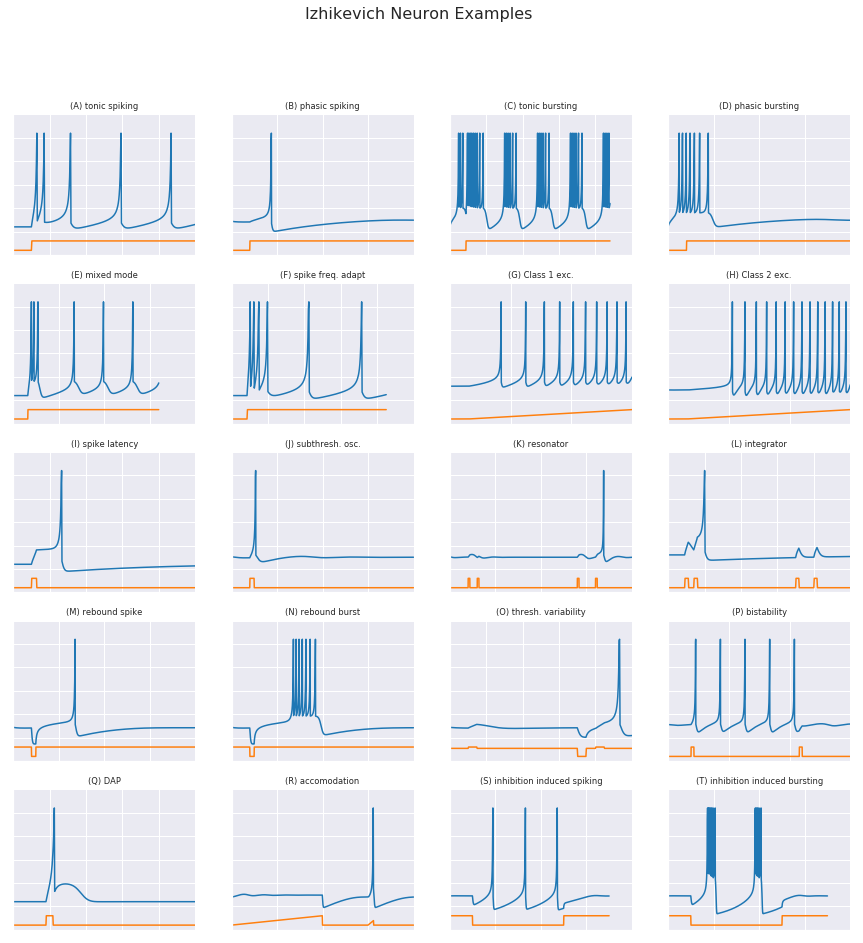

In [4]:
# Simulate neurons
fig = plt.figure(figsize=(15,15))
fig.suptitle('Izhikevich Neuron Examples', fontsize='16')
for i, s in enumerate(sims):
    trace = s.run()
    plt.subplot(5, 4, i+1)
    plt.plot(s.time, trace[0])
    plt.plot(s.time, -95 + ((s.stim - min(s.stim))/(max(s.stim) - min(s.stim)))*10)
    plt.xlim([0, s.time[-1]])
    plt.ylim([-100, 35])
    plt.title(s.neuron.label, size="small")
    plt.xticks(plt.xticks()[0], [])
    plt.yticks(plt.yticks()[0], [])
    sns.despine()